# Sentiment analysis

## Import dataset

In [ ]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# prompt: join the df_train and df_test dataframes into df_movies

df_movies = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_movies.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


## Text cleaning

In [ ]:
# prompt: remove html tags from df_movies

import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df_movies['text'] = df_movies['text'].apply(remove_html_tags)

In [ ]:
# prompt: remove special characters from df_movies

import pandas as pd
import re

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

df_movies['text'] = df_movies['text'].apply(remove_special_characters)

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
# prompt: expand contractions in df_movies

import contractions

def expand_contractions(text):
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df_movies['text'] = df_movies['text'].apply(expand_contractions)

In [ ]:
# prompt: make the df_movies lowercase

df_movies['text'] = df_movies['text'].str.lower()

In [ ]:
# prompt: remove whitespaces from df_movies

def remove_whitespace(text):
    text = text.strip()  # Remove leading/trailing whitespace
    text = " ".join(text.split())  # Remove extra whitespace between words
    return text

df_movies['text'] = df_movies['text'].apply(remove_whitespace)

In [ ]:
# prompt: remove numbers and stopwords from df_movies

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_numbers_and_stopwords(text):
    text = re.sub(r'\d+', '', text) # Remove numbers
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df_movies['text'] = df_movies['text'].apply(remove_numbers_and_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# prompt: lemmatize the df_movies

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_movies['text'] = df_movies['text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_movies.head()

,text,label
0,rented curiousyellow video store controversy s...,0
1,curious yellow risible pretentious steaming pi...,0
2,avoid making type film future film interesting...,0
3,film probably inspired godard masculin fminin ...,0
4,oh brotherafter hearing ridiculous film umptee...,0


## Split into training, test, validation

In [ ]:
# prompt: split the df_movies into training and test and validation sets with 80%, 10%, 10% sizes. each set contains equal amount of labels

from sklearn.model_selection import train_test_split

# Assuming 'label' column exists in your DataFrame
train_df, temp_df = train_test_split(
    df_movies, train_size=0.8, stratify=df_movies['label'], random_state=42
)
val_df, test_df = train_test_split(
    temp_df, train_size=0.5, stratify=temp_df['label'], random_state=42
)

print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (40000, 2)
Validation set shape: (5000, 2)
Test set shape: (5000, 2)


In [ ]:
# prompt: count the label values in each set

print("Label counts in training set:")
print(train_df['label'].value_counts())
print("\nLabel counts in test set:")
print(test_df['label'].value_counts())
print("\nLabel counts in validation set:")
print(val_df['label'].value_counts())

Label counts in training set:
label
1    20000
0    20000
Name: count, dtype: int64

Label counts in test set:
label
0    2500
1    2500
Name: count, dtype: int64

Label counts in validation set:
label
0    2500
1    2500
Name: count, dtype: int64


## WordCloud

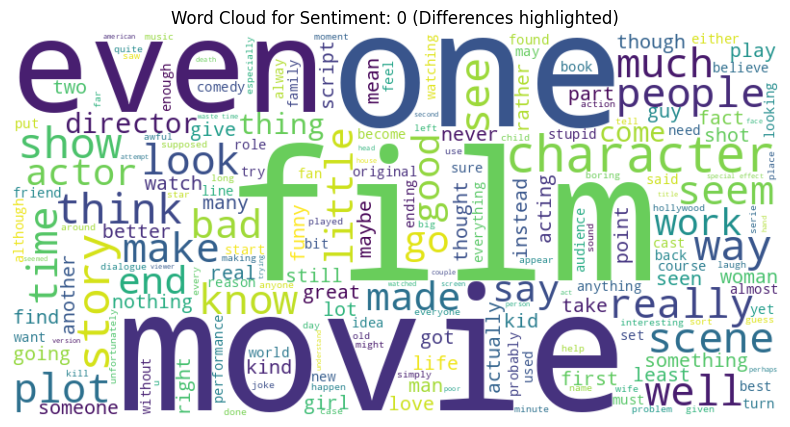

Words specific to sentiment 0 or with significant frequency difference compared to overall wordcloud:
movie: 0.20769099995347295
one: -0.11444424806782072
even: -0.1011226973319086
character: -0.13124602238090088
story: -0.10220588961548244
show: -0.15315014411450528
way: -0.11218353920325824
time: -0.12930568583371327
life: -0.15160803395293598
love: -0.10588406082932653
stupid: 0.10255599472990777
boring: 0.08527009222661397
kill: 0.08100131752305666
every: 0.07920948616600791
joke: 0.07910408432147563
minute: 0.07757575757575758
laugh: 0.07652173913043478
awful: 0.07515151515151515
supposed: 0.07483530961791832
poor: 0.07314888010540184
waste time: 0.07225296442687747
title: 0.07183135704874835
trying: 0.06924901185770752
seemed: 0.06787878787878789
screen: 0.06740447957839263
attempt: 0.0672463768115942
house: 0.06714097496706192
watched: 0.06592885375494072


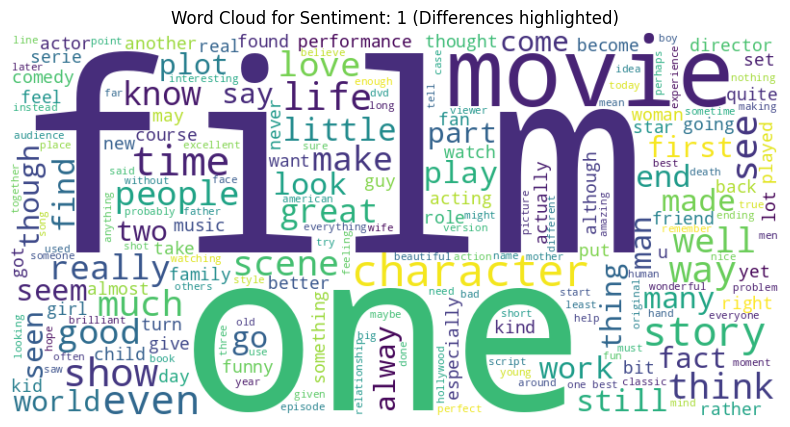

Words specific to sentiment 1 or with significant frequency difference compared to overall wordcloud:
one: -0.21292859741955983
character: -0.11795822720790822
even: -0.25354414541796183
show: -0.12597899782908478
way: -0.11158507725973615
think: -0.10958457112569675
know: -0.11219603266217429
look: -0.11923457734929852
seem: -0.11740855400658892
bad: -0.10780574426730712
wonderful: 0.0875114877974063
excellent: 0.08597978147656489
one best: 0.08245685693862963
perfect: 0.07500255284386807
style: 0.0741345859287246
year: 0.07403247217400184
today: 0.0736240171551108
brilliant: 0.07270499336260594
feeling: 0.07096905953231901
different: 0.07091800265495762
human: 0.07081588890023487
amazing: 0.0699479219850914
later: 0.0691310119473093
relationship: 0.06851832941897273
men: 0.06800776064535893
true: 0.0678035331359134
experience: 0.06765036250382926
three: 0.06673133871132442
dvd: 0.06601654242826509
together: 0.06601654242826509
mind: 0.0657102011640968
sometime: 0.06525068926784437


In [ ]:
# prompt: show only the differecnes in each wordcloud

import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (Your existing code for data loading and preprocessing)

# Assuming 'df_movies' is your DataFrame and it has a 'label' column indicating sentiment
# and a 'text' column containing the text data.

# Group data by sentiment label
sentiment_groups = df_movies.groupby('label')

# Create a combined wordcloud for all sentiments first
all_text = ' '.join(df_movies['text'].astype(str))
all_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Function to find differences between two wordclouds
def find_wordcloud_diff(wc1, wc2):
    words1 = wc1.words_
    words2 = wc2.words_

    diff_words = {}

    for word, freq in words1.items():
        if word not in words2:
            diff_words[word] = freq
        elif abs(words1[word]-words2[word]) >0.1:
             diff_words[word] = words1[word] - words2[word]

    return diff_words

# Create and display wordclouds, showing differences from the overall wordcloud
for label, group in sentiment_groups:
    text = ' '.join(group['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    diff = find_wordcloud_diff(wordcloud, all_wordcloud)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Sentiment: {label} (Differences highlighted)")
    plt.show()

    print(f"Words specific to sentiment {label} or with significant frequency difference compared to overall wordcloud:")
    for word, freq in diff.items():
        print(f"{word}: {freq}")  # Display differences

## Tokenization and vectorization

In [ ]:
vectorization={}
def cv_and_tfidf(minNgram, maxNgram, analyzer, maxFeatures, name):

  # Import
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.feature_extraction.text import CountVectorizer
  from tqdm import tqdm

  # Create a TfidfVectorizer
  tfidf = TfidfVectorizer(ngram_range=(minNgram, maxNgram), analyzer=analyzer, max_features=maxFeatures)

  # Fit, transform and put in a dictionary
  vectorization[name+"-tfidf"] = [tfidf.fit_transform(tqdm(train_df['text'], desc='TF-IDF-'+analyzer+'-'+str(minNgram)+str(maxNgram))), tfidf.transform(tqdm(test_df['text'])), tfidf.transform(tqdm(val_df['text']))]

  # Create a CountVectorizer
  cv = CountVectorizer(ngram_range=(minNgram, maxNgram), analyzer=analyzer, max_features=maxFeatures)

  # Fit, transform and put in a dictionary
  vectorization[name+"-cv"] = [cv.fit_transform(tqdm(train_df['text'], desc='CV-'+analyzer+'-'+str(minNgram)+str(maxNgram))), cv.transform(tqdm(test_df['text'])), cv.transform(tqdm(val_df['text']))]

In [ ]:
maxFeatures=8000
for analyzer in ['word', 'char']:

  cv_and_tfidf(1, 1, analyzer, maxFeatures, analyzer+'-1')
  cv_and_tfidf(2, 2, analyzer, maxFeatures, analyzer+'-2')
  cv_and_tfidf(3, 3, analyzer, maxFeatures, analyzer+'-3')
  cv_and_tfidf(4, 4, analyzer, maxFeatures, analyzer+'-4')
  cv_and_tfidf(6, 6, analyzer, maxFeatures, analyzer+'-6')
  cv_and_tfidf(8, 8, analyzer, maxFeatures, analyzer+'-8')



100%|██████████| 5000/5000 [00:03<00:00, 1510.98it/s]


In [ ]:
# prompt: Use Byte pair encoding to tokenize train_df, test_df, val_df

!pip install tokenizers

from tokenizers import ByteLevelBPETokenizer

# Initialize the tokenizer
tokenizer = ByteLevelBPETokenizer()

# Train the tokenizer on the training data
tokenizer.train_from_iterator(train_df['text'], vocab_size=8000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

# Tokenize the datasets
def tokenize_data(df):
    tokenized_data = []
    for text in df['text']:
        tokenized_data.append(tokenizer.encode(text).ids)
    return tokenized_data

train_tokens = tokenize_data(train_df)
test_tokens = tokenize_data(test_df)
val_tokens = tokenize_data(val_df)

In [ ]:
# prompt: vectorize train_tokens, test_tokens, val_tokens using tfidf and cv and add them to vectorization

# Assuming you have train_tokens, test_tokens, and val_tokens from the previous code.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# Convert token lists back to strings for vectorization
train_text = [' '.join(map(str, tokens)) for tokens in train_tokens]
test_text = [' '.join(map(str, tokens)) for tokens in test_tokens]
val_text = [' '.join(map(str, tokens)) for tokens in val_tokens]

def cv_and_tfidf_tokens(name, train, test, val):
    tfidf = TfidfVectorizer()
    vectorization[name + "-tfidf"] = [tfidf.fit_transform(tqdm(train, desc='TF-IDF-' + name)),
                                      tfidf.transform(tqdm(test)),
                                      tfidf.transform(tqdm(val))]

    cv = CountVectorizer()
    vectorization[name + "-cv"] = [cv.fit_transform(tqdm(train, desc='CV-' + name)),
                                   cv.transform(tqdm(test)),
                                   cv.transform(tqdm(val))]

cv_and_tfidf_tokens('tokens', train_text, test_text, val_text)

100%|██████████| 5000/5000 [00:00<00:00, 8299.89it/s]


## Files

In [ ]:
# Mount Google Drive to access its files
from google.colab import drive
drive.mount('/content/drive')

# prompt: write vectorization to google drive

import pickle
with open('/content/drive/My Drive/vectorization.pkl', 'wb') as f:
  pickle.dump(vectorization, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: read vectorization from google drive

import pickle
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/vectorization.pkl', 'rb') as f:
  vectorization = pickle.load(f)

# Now you can use the loaded 'vectorization' dictionary
print(vectorization.keys())

Mounted at /content/drive
dict_keys(['word-1-tfidf', 'word-1-cv', 'word-2-tfidf', 'word-2-cv', 'word-3-tfidf', 'word-3-cv', 'word-4-tfidf', 'word-4-cv', 'word-6-tfidf', 'word-6-cv', 'word-8-tfidf', 'word-8-cv', 'char-1-tfidf', 'char-1-cv', 'char-2-tfidf', 'char-2-cv', 'char-3-tfidf', 'char-3-cv', 'char-4-tfidf', 'char-4-cv', 'char-6-tfidf', 'char-6-cv', 'char-8-tfidf', 'char-8-cv', 'tokens-tfidf', 'tokens-cv'])


## Comparing cv, tfidf, ngram sizes, word/char analyzers

In [ ]:
results = {}
modelResults = {}

In [ ]:
import tensorflow as tf
def evaulate_ngram(train,test,val,type):

  # Define the model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train.shape[1],))
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  # Train the model
  model.fit(train.toarray(), train_df['label'], epochs=10, batch_size=32, validation_data=(val.toarray(), val_df['label']))

  # Evaluate the model
  loss, accuracy = model.evaluate(test.toarray(), test_df['label'])
  results[type] = {'loss': loss, 'accuracy': accuracy}
  if (type == 'word-1-tfidf'):
    modelResults['1-layer'] = {'loss': loss, 'accuracy': accuracy}

In [ ]:
# prompt: loop through vectorization

for key, value in vectorization.items():
    evaulate_ngram(value[0], value[1], value[2], key)
results

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7768 - loss: 0.6504 - val_accuracy: 0.8598 - val_loss: 0.5485
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8686 - loss: 0.5197 - val_accuracy: 0.8674 - val_loss: 0.4668
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8802 - loss: 0.4425 - val_accuracy: 0.8718 - val_loss: 0.4153
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8853 - loss: 0.3937 - val_accuracy: 0.8790 - val_loss: 0.3801
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8890 - loss: 0.3590 - val_accuracy: 0.8826 - val_loss: 0.3548
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8944 - loss: 0.3307 - val_accuracy: 0.8838 - val_loss: 0.3360
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8998 - loss: 0.3107 - val_accuracy: 0.8854 - val_loss: 0.3217
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9029 - loss: 0.2971 - 

{'word-1-tfidf': {'loss': 0.2900331914424896, 'accuracy': 0.8938000202178955},
 'word-1-cv': {'loss': 0.2899802625179291, 'accuracy': 0.8894000053405762},
 'word-2-tfidf': {'loss': 0.40964633226394653, 'accuracy': 0.8313999772071838},
 'word-2-cv': {'loss': 0.37416359782218933, 'accuracy': 0.8307999968528748},
 'word-3-tfidf': {'loss': 0.5697292685508728, 'accuracy': 0.6988000273704529},
 'word-3-cv': {'loss': 0.5487385988235474, 'accuracy': 0.6998000144958496},
 'word-4-tfidf': {'loss': 0.6570409536361694, 'accuracy': 0.5659999847412109},
 'word-4-cv': {'loss': 0.6544761061668396, 'accuracy': 0.5666000247001648},
 'word-6-tfidf': {'loss': 0.690953254699707, 'accuracy': 0.5040000081062317},
 'word-6-cv': {'loss': 0.6906996369361877, 'accuracy': 0.5040000081062317},
 'word-8-tfidf': {'loss': 0.6920424103736877, 'accuracy': 0.5009999871253967},
 'word-8-cv': {'loss': 0.691856861114502, 'accuracy': 0.5009999871253967},
 'char-1-tfidf': {'loss': 0.6732354760169983, 'accuracy': 0.6187999844

## Comparing models

In [ ]:
# prompt: write code for a model using tensorboard and 2 layers using word-11-tfidf key from vectorization dictionary.

import tensorflow as tf

# Assuming vectorization dictionary is loaded and available
# ... (your existing code to load vectorization)

# Access the TF-IDF features for word-11
train_data = vectorization['word-1-tfidf'][0]
val_data = vectorization['word-1-tfidf'][2]


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),  # First layer with 64 units
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with TensorBoard callback
model.fit(train_data.toarray(), train_df['label'], epochs=10, batch_size=32,
          validation_data=(val_data.toarray(), val_df['label']),
          callbacks=[tensorboard_callback])


# Evaluate the model (example)
test_data = vectorization['word-1-tfidf'][1]
loss, accuracy = model.evaluate(test_data.toarray(), test_df['label'])
modelResults['2-layer'] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8377 - loss: 0.4226 - val_accuracy: 0.8946 - val_loss: 0.2573
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9192 - loss: 0.2049 - val_accuracy: 0.8862 - val_loss: 0.2679
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9312 - loss: 0.1788 - val_accuracy: 0.8838 - val_loss: 0.2827
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9395 - loss: 0.1586 - val_accuracy: 0.8838 - val_loss: 0.2886
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9424 - loss: 0.1490 - val_accuracy: 0.8804 - val_loss: 0.3063
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9517 - loss: 0.1265 - val_accuracy: 0.8770 - val_loss: 0.3323
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9572 - loss: 0.1078 - val_accuracy: 0.8736 - val_loss: 0.3634
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9673 - 

In [ ]:
# prompt: write code for a model using tensorboard and 3 layers using word-11-tfidf key from vectorization dictionary.

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(vectorization['word-1-tfidf'][0].shape[1],)),  # First layer
    tf.keras.layers.Dense(32, activation='relu'),  # Second layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with TensorBoard callback
model.fit(vectorization['word-1-tfidf'][0].toarray(), train_df['label'], epochs=10, batch_size=32,
          validation_data=(vectorization['word-1-tfidf'][2].toarray(), val_df['label']),
          callbacks=[tensorboard_callback])

# Evaluate the model
loss, accuracy = model.evaluate(vectorization['word-1-tfidf'][1].toarray(), test_df['label'])
modelResults['3-layer'] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8365 - loss: 0.3950 - val_accuracy: 0.8934 - val_loss: 0.2626
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9230 - loss: 0.1948 - val_accuracy: 0.8888 - val_loss: 0.2689
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9383 - loss: 0.1582 - val_accuracy: 0.8848 - val_loss: 0.2850
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9638 - loss: 0.0970 - val_accuracy: 0.8812 - val_loss: 0.3700
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.8822 - val_loss: 0.5055
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9976 - loss: 0.0110 - val_accuracy: 0.8792 - val_loss: 0.6086
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.8782 - val_loss: 0.8019
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 1.0000 - 

In [ ]:
# prompt: write code for a model using tensorboard and 4 layers using word-11-tfidf key from vectorization dictionary.

import tensorflow as tf

# Assuming vectorization['word-11-tfidf'] contains the data
train_data = vectorization['word-1-tfidf'][0]
val_data = vectorization['word-1-tfidf'][2]
test_data = vectorization['word-1-tfidf'][1]

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model with TensorBoard callback
model.fit(train_data.toarray(), train_df['label'], epochs=10, batch_size=32,
          validation_data=(val_data.toarray(), val_df['label']),
          callbacks=[tensorboard_callback])

# Evaluate the model
loss, accuracy = model.evaluate(test_data.toarray(), test_df['label'])
modelResults['4-layer'] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8278 - loss: 0.3869 - val_accuracy: 0.8892 - val_loss: 0.2631
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9241 - loss: 0.1981 - val_accuracy: 0.8830 - val_loss: 0.2738
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9449 - loss: 0.1445 - val_accuracy: 0.8796 - val_loss: 0.3099
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9729 - loss: 0.0752 - val_accuracy: 0.8816 - val_loss: 0.4449
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9920 - loss: 0.0205 - val_accuracy: 0.8804 - val_loss: 0.6321
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9970 - loss: 0.0073 - val_accuracy: 0.8792 - val_loss: 0.8683
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.8738 - val_loss: 1.0247
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9981 - 

In [ ]:
# prompt: write code for a model using tensorboard and 5 layers using word-11-tfidf key from vectorization dictionary.

# Assuming vectorization['word-11-tfidf'] contains your data
train_data = vectorization['word-1-tfidf'][0]
val_data = vectorization['word-1-tfidf'][2]
test_data = vectorization['word-1-tfidf'][1]

# Define the model with 5 layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model
model.fit(train_data.toarray(), train_df['label'], epochs=10, batch_size=32,
          validation_data=(val_data.toarray(), val_df['label']),
          callbacks=[tensorboard_callback])

# Evaluate the model
loss, accuracy = model.evaluate(test_data.toarray(), test_df['label'])
modelResults['5-layer'] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.8375 - loss: 0.3790 - val_accuracy: 0.8918 - val_loss: 0.2651
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9267 - loss: 0.1866 - val_accuracy: 0.8886 - val_loss: 0.2830
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9708 - loss: 0.0830 - val_accuracy: 0.8786 - val_loss: 0.4057
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.8834 - val_loss: 0.7391
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.8826 - val_loss: 0.8934
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 1.0000 - loss: 6.3775e-05 - val_accuracy: 0.8836 - val_loss: 0.9855
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 1.0000 - loss: 1.7860e-05 - val_accuracy: 0.8840 - val_loss: 1.0833
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 

## Results

In [ ]:
# prompt: covert results and modelResults into pd dataframe

import pandas as pd

# Assuming 'results' and 'modelResults' are dictionaries as defined in your code.

results_df = pd.DataFrame.from_dict(results, orient='index')
modelResults_df = pd.DataFrame.from_dict(modelResults, orient='index')

print("Results DataFrame:")
print(results_df)

print("\nModel Results DataFrame:")
modelResults_df

Results DataFrame:
                  loss  accuracy
word-1-tfidf  0.290033    0.8938
word-1-cv     0.289980    0.8894
word-2-tfidf  0.409646    0.8314
word-2-cv     0.374164    0.8308
word-3-tfidf  0.569729    0.6988
word-3-cv     0.548739    0.6998
word-4-tfidf  0.657041    0.5660
word-4-cv     0.654476    0.5666
word-6-tfidf  0.690953    0.5040
word-6-cv     0.690700    0.5040
word-8-tfidf  0.692042    0.5010
word-8-cv     0.691857    0.5010
char-1-tfidf  0.673235    0.6188
char-1-cv     0.655326    0.6236
char-2-tfidf  0.491698    0.7694
char-2-cv     0.482534    0.7798
char-3-tfidf  0.332611    0.8654
char-3-cv     0.351225    0.8650
char-4-tfidf  0.290198    0.8834
char-4-cv     0.356944    0.8714
char-6-tfidf  0.293069    0.8738
char-6-cv     0.333619    0.8684
char-8-tfidf  0.319971    0.8706
char-8-cv     0.349807    0.8582
tokens-tfidf  0.297463    0.8898
tokens-cv     0.299351    0.8862

Model Results DataFrame:


,loss,accuracy
1-layer,0.290033,0.8938
2-layer,0.559108,0.8680
3-layer,1.151259,0.8788
4-layer,1.182433,0.8714
5-layer,1.385394,0.8794


In [ ]:
# prompt: write results_df and modelResults_df to google drive

# Save the DataFrames to Google Drive
results_df.to_csv('/content/drive/My Drive/results_df.csv', index=True)
modelResults_df.to_csv('/content/drive/My Drive/modelResults_df.csv', index=True)

In [ ]:
# prompt: read results_df and modelResults_df to google drive

# Assuming 'results_df' and 'modelResults_df' are already defined as pandas DataFrames.
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the DataFrames to Google Drive
results_df.to_csv('/content/drive/My Drive/results_df.csv', index=True)
modelResults_df.to_csv('/content/drive/My Drive/modelResults_df.csv', index=True)

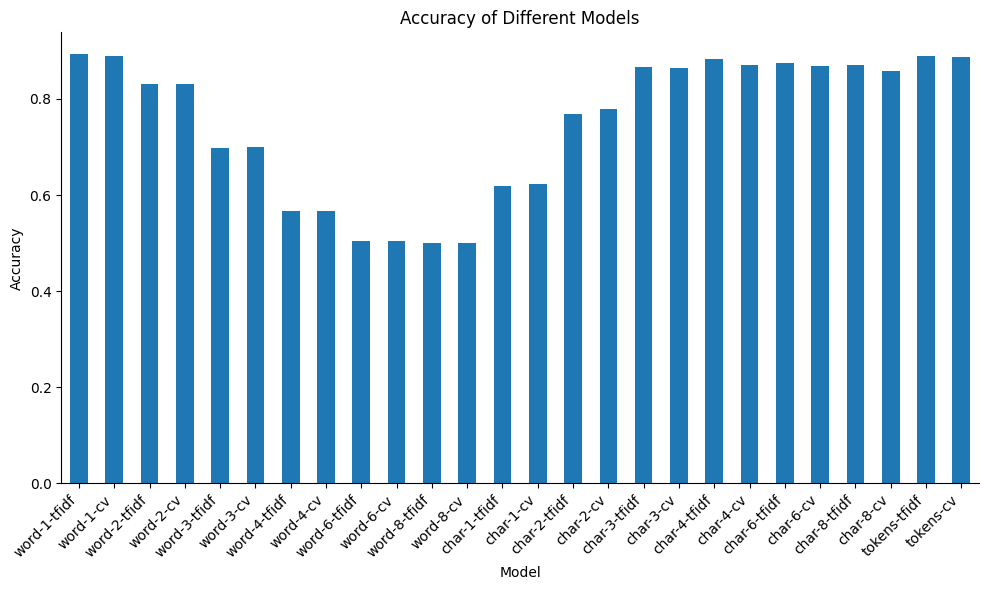

In [ ]:
# prompt: modify the previous plot to show each title

import matplotlib.pyplot as plt

# Assuming 'results' dictionary is already populated as in your provided code
results_df = pd.DataFrame.from_dict(results, orient='index')
#results_df = results_df.sort_values(by='accuracy', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
results_df['accuracy'].plot(kind='bar', title='Accuracy of Different Models')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

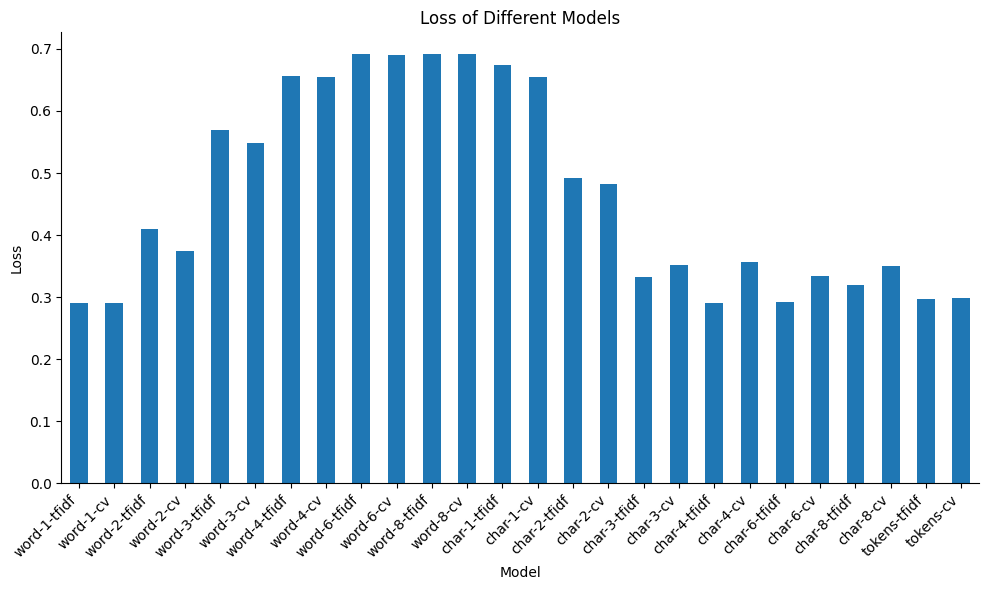

In [ ]:
# prompt: show the loss of each model on a plot

# Assuming 'results' dictionary is already populated as in your provided code
results_df = pd.DataFrame.from_dict(results, orient='index')

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
results_df['loss'].plot(kind='bar', title='Loss of Different Models')
plt.xlabel("Model")
plt.ylabel("Loss")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# prompt: sort results by accuracy

# Assuming 'results' dictionary is already populated as in your provided code
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='accuracy', ascending=False)
results_df

,loss,accuracy
word-1-tfidf,0.290033,0.8938
tokens-tfidf,0.297463,0.8898
word-1-cv,0.289980,0.8894
tokens-cv,0.299351,0.8862
char-4-tfidf,0.290198,0.8834
char-6-tfidf,0.293069,0.8738
char-4-cv,0.356944,0.8714
char-8-tfidf,0.319971,0.8706
char-6-cv,0.333619,0.8684
char-3-tfidf,0.332611,0.8654


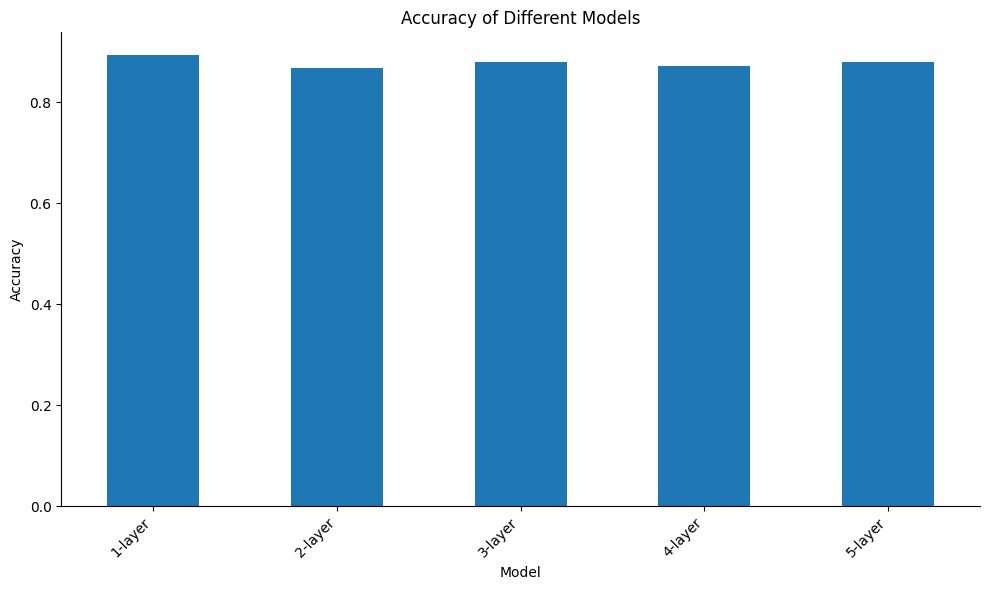

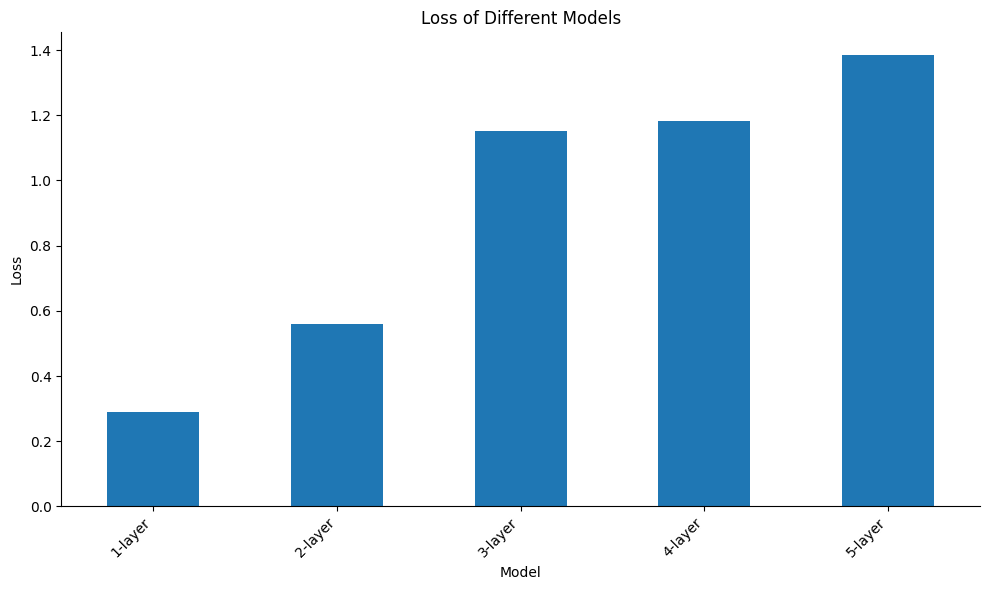

In [ ]:
# prompt: display modelResults_df on a graph highlight the differences

import matplotlib.pyplot as plt

# Assuming modelResults_df is already defined as a pandas DataFrame
# ... (your existing code to create modelResults_df)

# Create the plot
plt.figure(figsize=(10, 6))
modelResults_df['accuracy'].plot(kind='bar', title='Accuracy of Different Models')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(10, 6))
modelResults_df['loss'].plot(kind='bar', title='Loss of Different Models')
plt.xlabel("Model")
plt.ylabel("Loss")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# prompt: sort modelResults by loss

modelResults_df = pd.DataFrame.from_dict(modelResults, orient='index')
modelResults_df = modelResults_df.sort_values(by='loss')
modelResults_df

,loss,accuracy
1-layer,0.290033,0.8938
2-layer,0.559108,0.8680
3-layer,1.151259,0.8788
4-layer,1.182433,0.8714
5-layer,1.385394,0.8794


In [ ]:
# // create wordcloud from each sentiment type done
# // do BPE tokenization done
# vizualizacio done
# videohoz: milyen szovegtisztitast hasznaltam es miert?
# videohoz: kulonbozo vectorizacio mukodesenek elmagyarazasa